<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan

> 10/5/23

> Project 3





###Description:<br>

> The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(less than 65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Adult mortality rates affect life expectancy?
4. Does Life Expectancy have positive or negative correlation with eating habits, social factors, drinking alcohol, etc.?
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?



# **Part 1(SQL)**


> This portion of the project will consist of coding in SQL. I will be importing the csv into SQL and cleaning the data set of any noise. I will then analyze the countries and columns in this data set.



Import the life expectancy data file found here (https://github.com/bforoura/IDS/tree/main/HW3Links.) into SQL.


> I used the CSV to SQL converter to transfer the values from that data set into SQL.




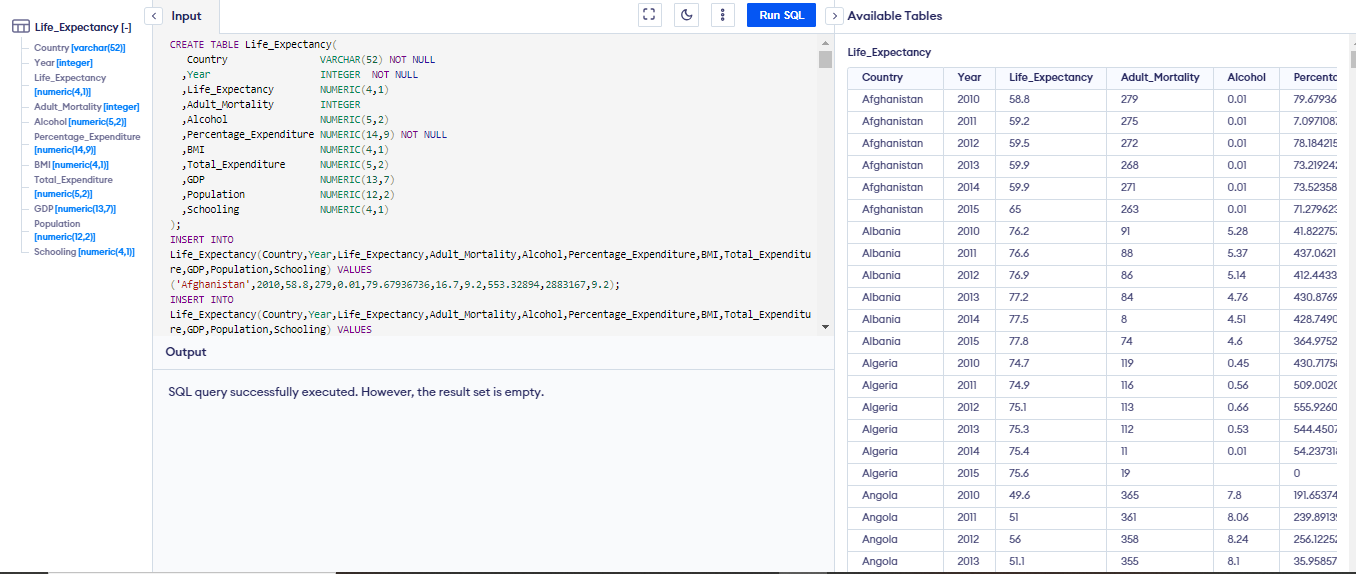

Delete all rows with population = 0


> See the SQL code below to see how I deleted all of the rows that did not have a value for population. There were quite a few null values for population before they were deleted.

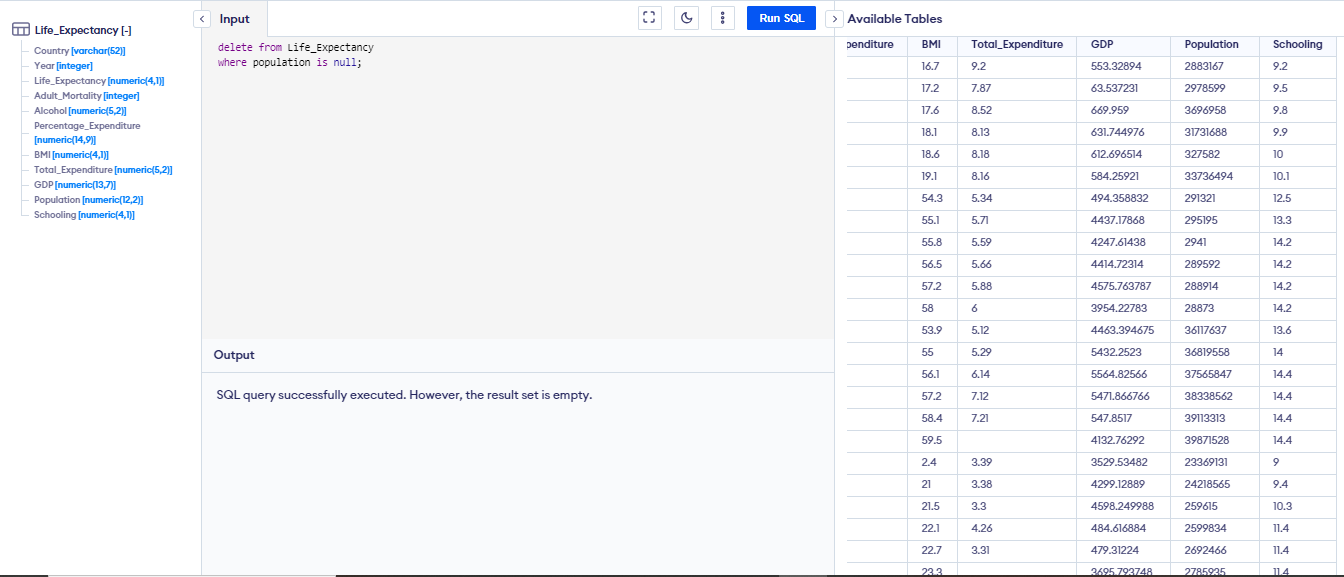



Perform further data cleaning for other attributes, as necessary.

> All of the null or zero values have been replaced at this point. The first screenshot cleans life expectancy, adult mortality, alcohol, and percentage expediture. Percentage expenditure was set for there to be no null values, so I make sure to take the average excluding all the zeros. Then I replaced the zeros with that average. The second screenshot covers BMI, total expenditure and GDP. The column values not listed did not have any 0 or null values.


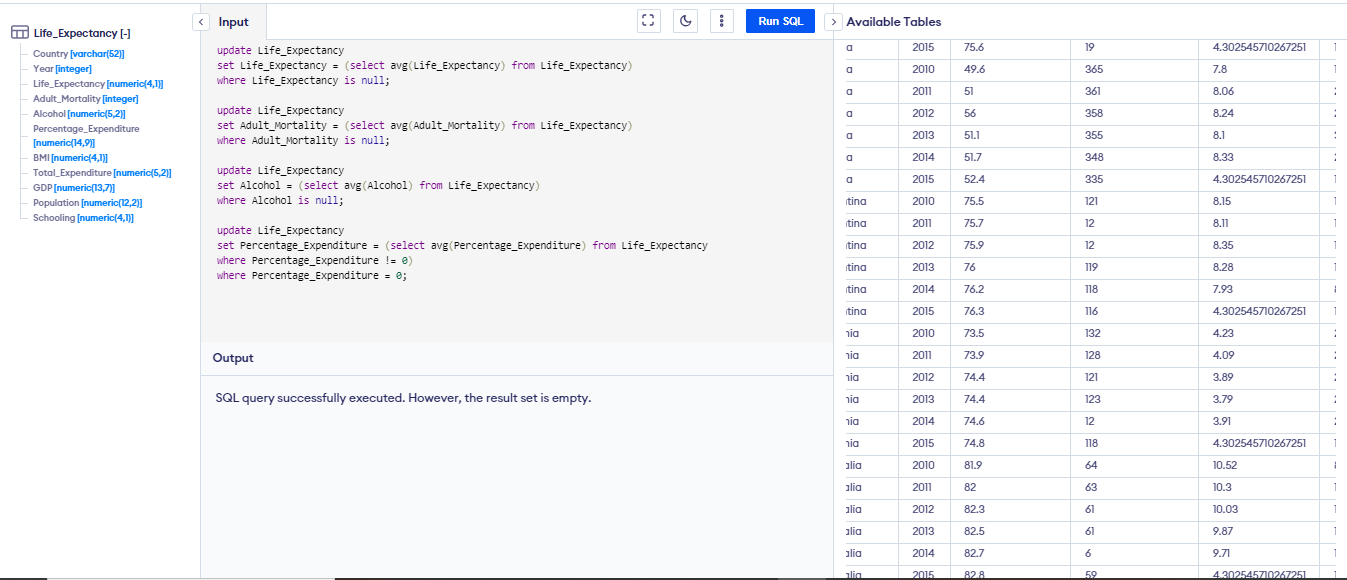

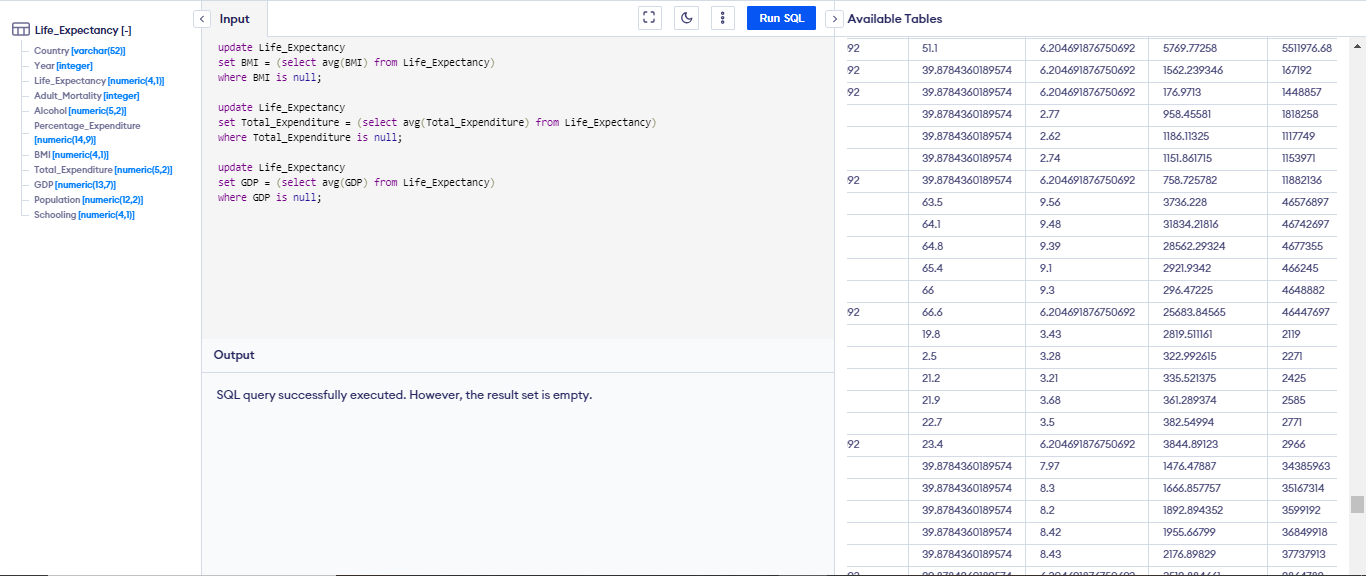

Display total count of countries after data cleaning.


> The first screenshot displays the total number of rows that there are. However, many countries are listed more than one time, so I made a second screenshot that displays the count for unique countries. There are 145 total unique countries remaining.

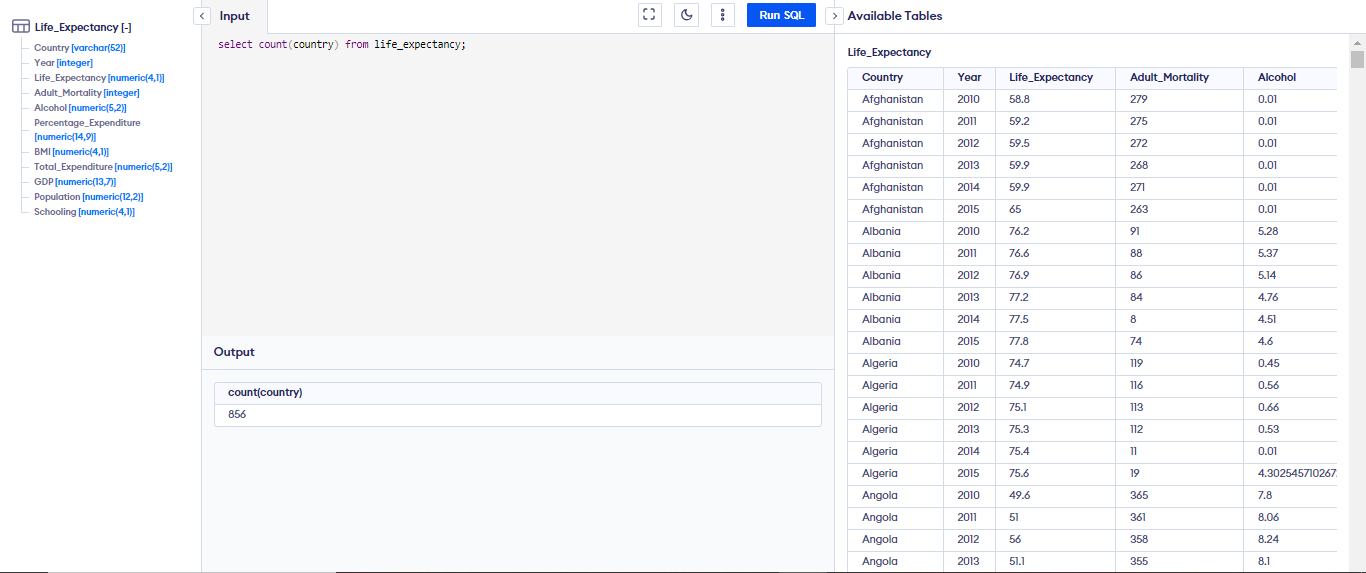
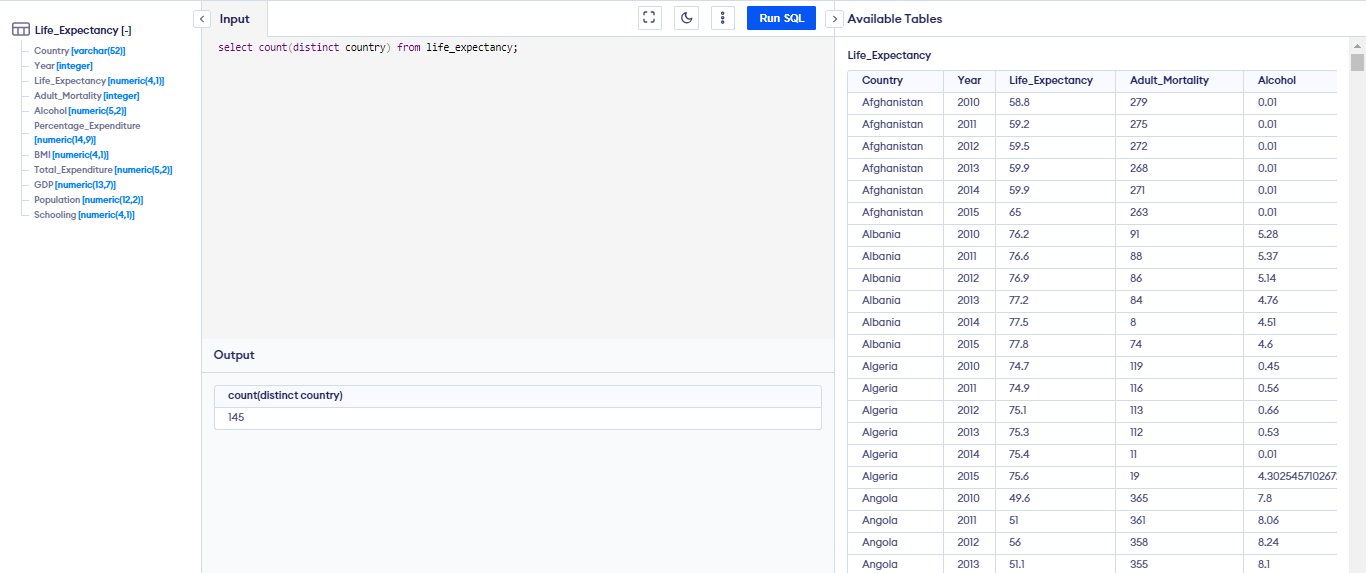



List of countries with the highest and lowest average mortality rates (years 2010-2015)



> Highest: Lesotho

> Lowest: Tunisia






> I first found the average mortality rate for all countries and sorted it. I then found the highest and lowest averages and displayed them at the top. The first screenshot displays the lowest averages in ascending order. The second screenshot displays the highest averages in descending order.



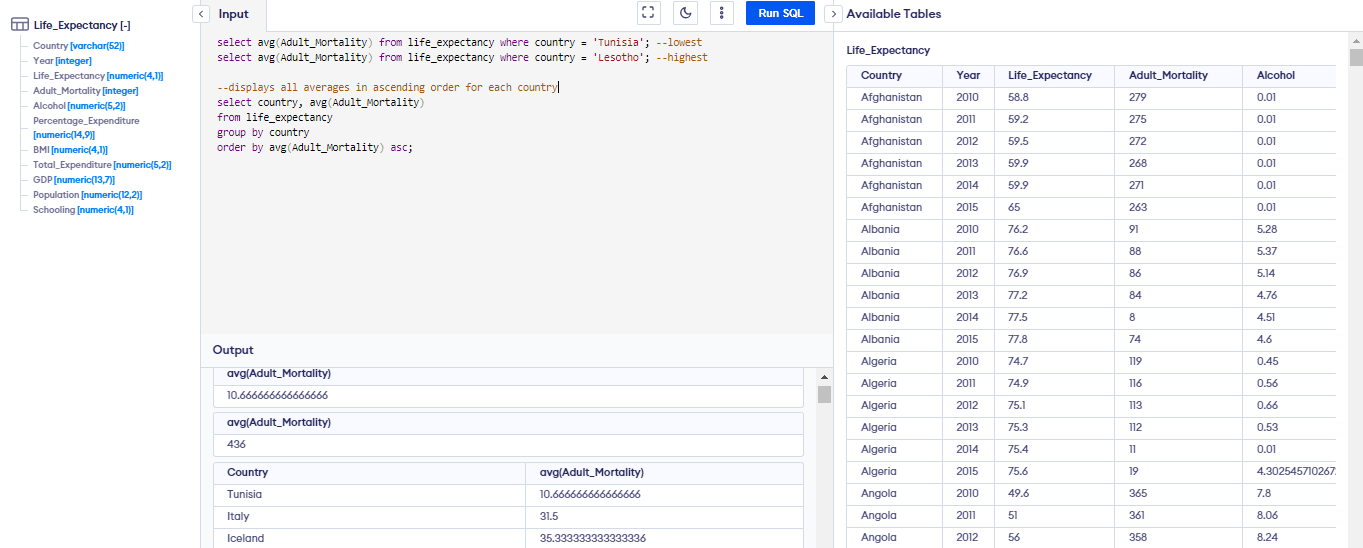
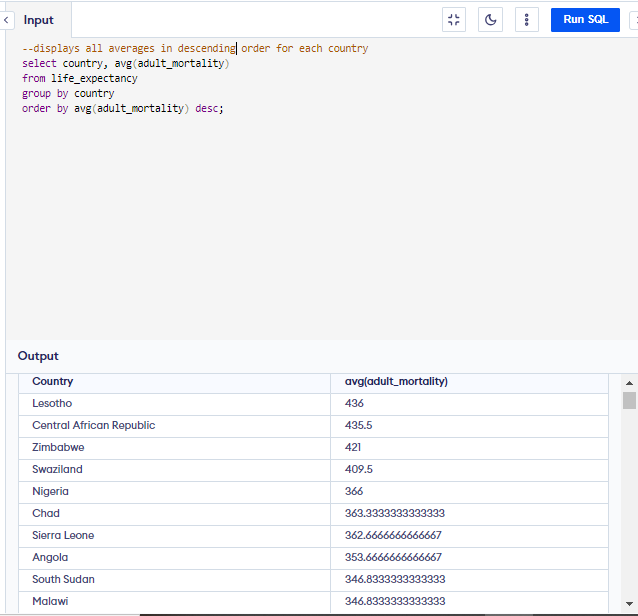

List of countries with the highest and lowest average population (years 2010-2015)

> Highest: India

> Lowest: Palau

> I first found the average population for all countries and sorted it. I then found the highest and lowest averages and displayed them at the top. The first screenshot displays the lowest averages in ascending order. The second screenshot displays the highest averages in descending order.

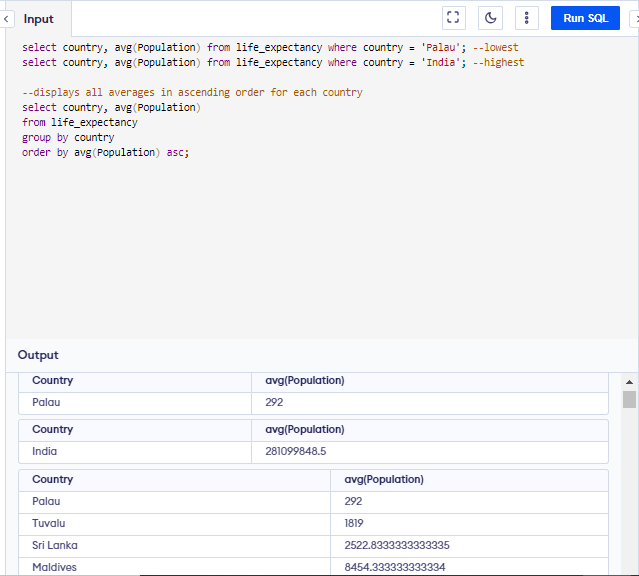

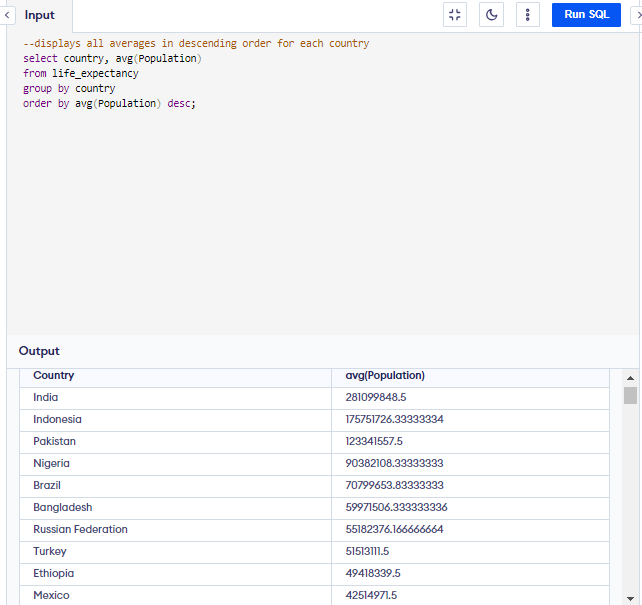

List of countries with the highest and lowest average GDP (years 2010-2015)

> Highest: Switzerland

> Lowest: Senegal

> I first found the average GDP for all countries and sorted it. I then found the highest and lowest averages and displayed them at the top. The first screenshot displays the lowest averages in ascending order. The second screenshot displays the highest averages in descending order.

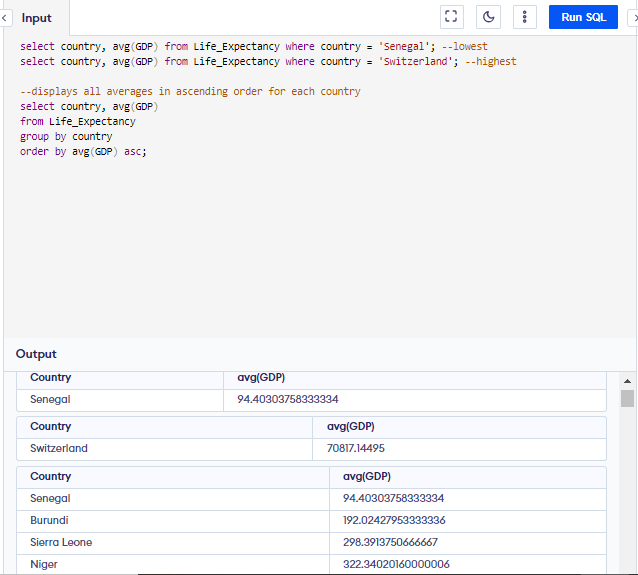

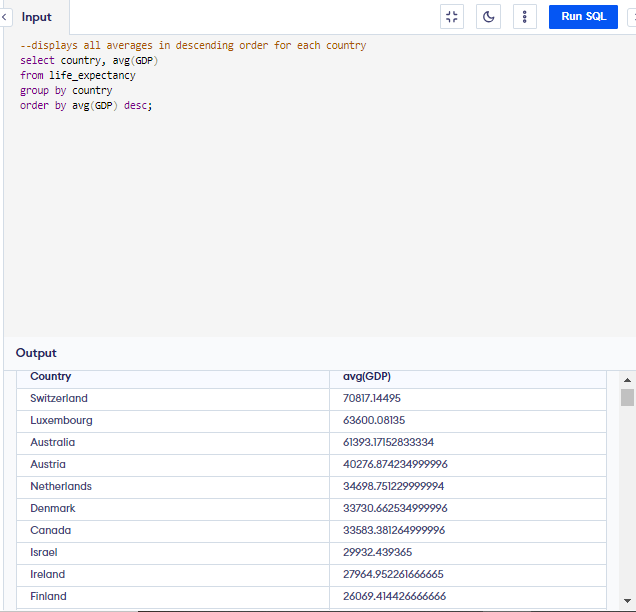


List of countries with the highest and lowest average Schooling  (years 2010-2015)

> Highest: Australia

> Lowest: Tuvalu

> I first found the average schooling for all countries and sorted it. I then found the highest and lowest averages and displayed them at the top. The first screenshot displays the lowest averages in ascending order. The second screenshot displays the highest averages in descending order.

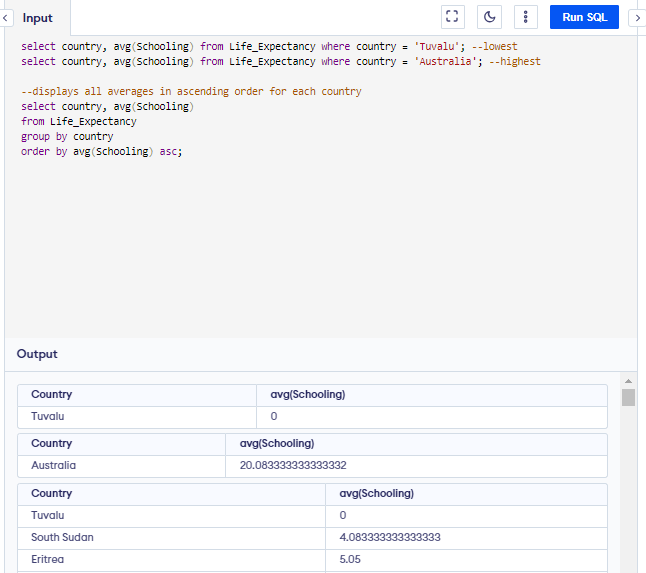

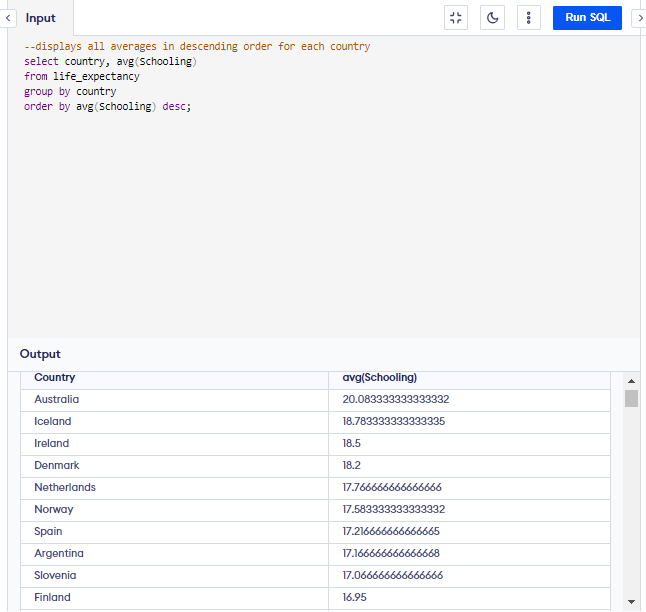

Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?

> Highest: Belarus

> Lowest: Afghanistan

> I first found the average alcohol consumption for all countries and sorted it. I then found the highest and lowest averages and displayed them at the top. One thing I noticed here is that Afghanistan and Tuvalu are both tied for the lowest average alcohol consumption with a value of 0.01. The first screenshot displays the lowest averages in ascending order. The second screenshot displays the highest averages in descending order.

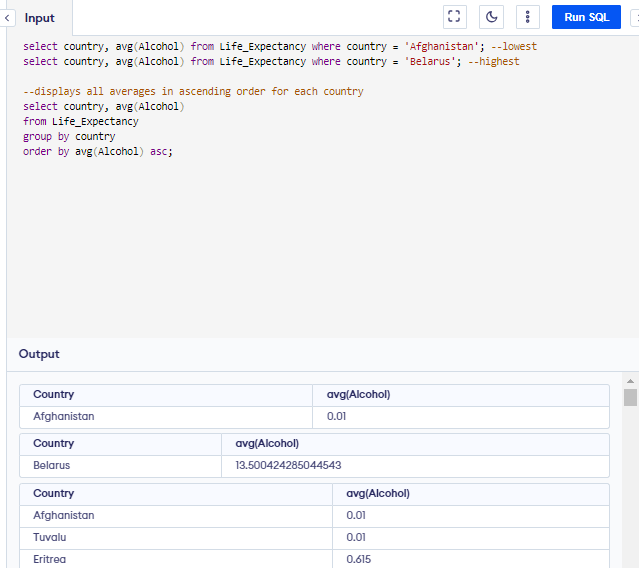

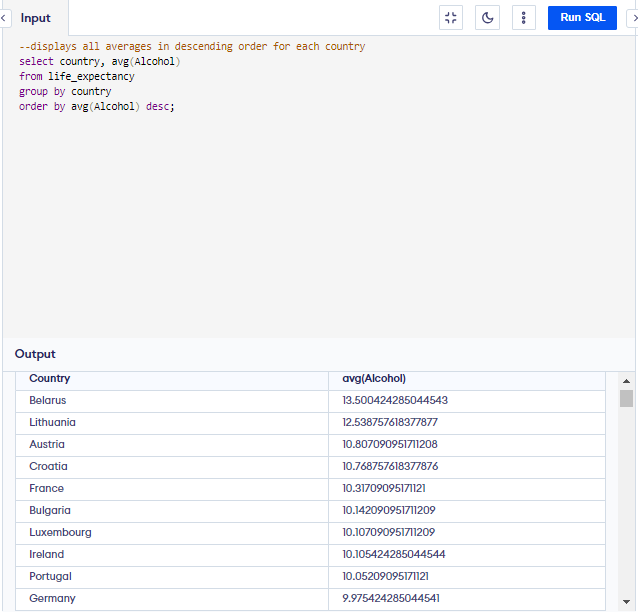

Do densely populated countries tend to have lower life expectancy?


> To analyze this data, I displayed the country, average life expectancy and  population. I grouped by the countries and ordered the data.


> As you can see in the first screenshot, the countries with the lowest life expectancy are displayed in ascending order. In the second screenshot, I displayed the countries with their populations in descending order. After comparing the most densely populated countries with the lowest life expectancy countries, it can be concluded that densely populated countries in this data set do not tend to have lower life expectancy.

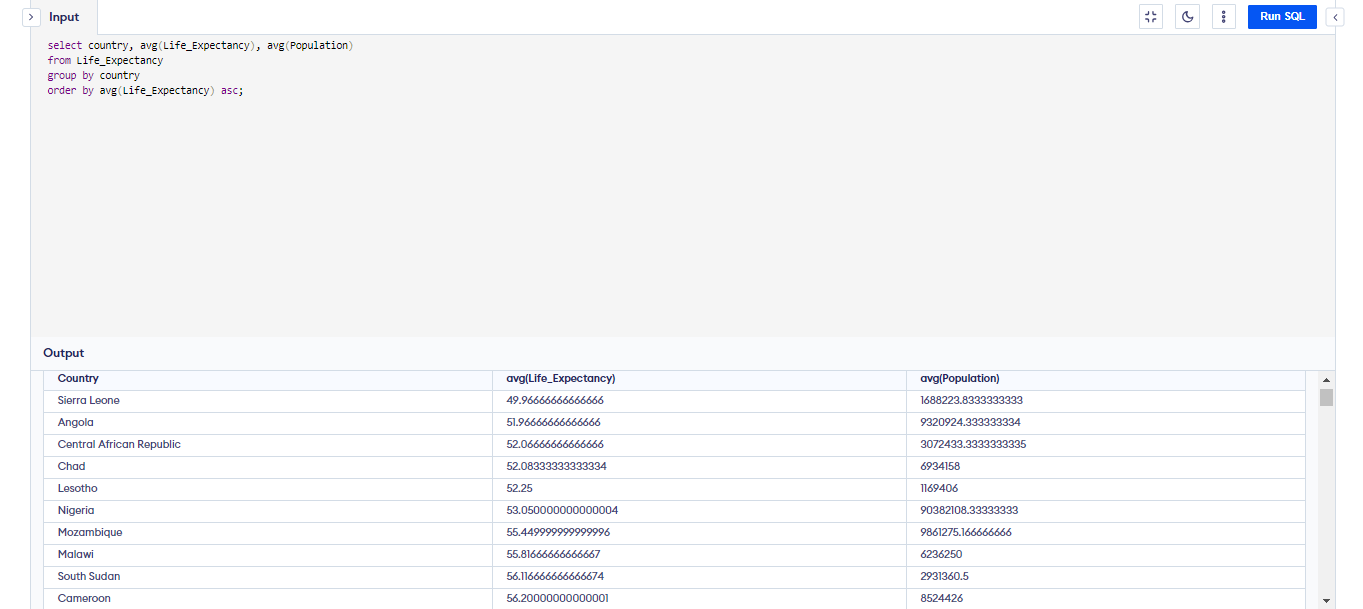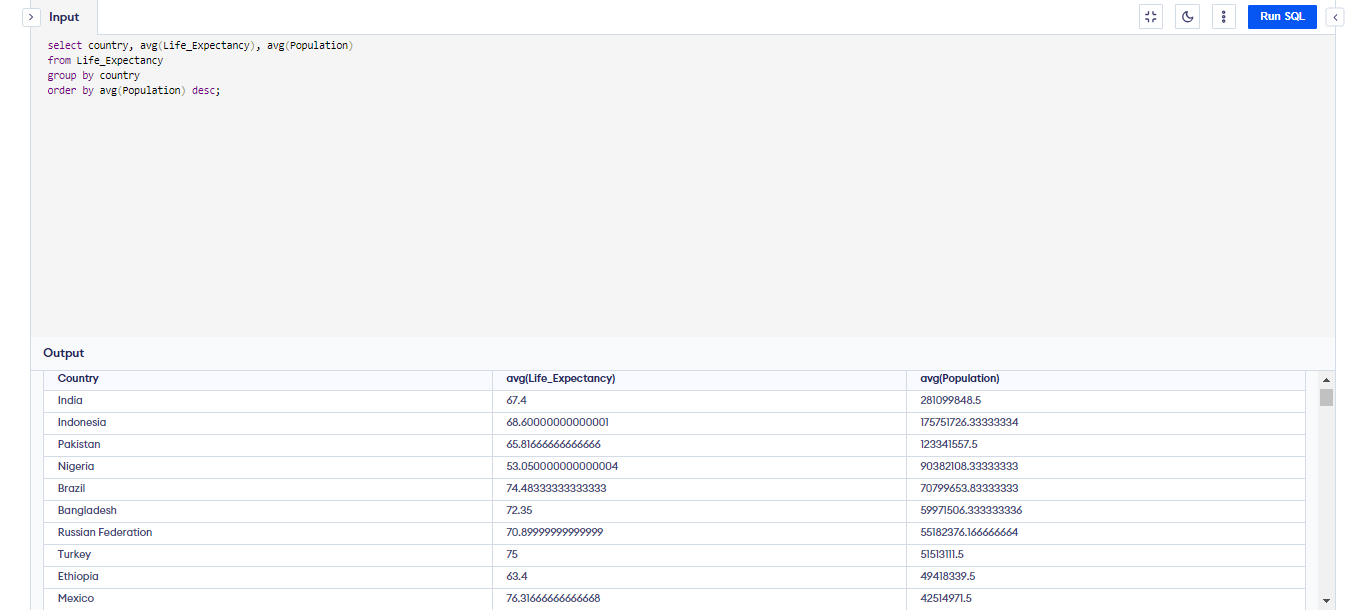





##Conclusion


> After cleaning the data set of noise, I was able to analyze it. I discovered the averages of just about every country and column in the table. I have not researched this topic before, so I found it interesting to discover the highest and lowest average values for each piece of data.



# **Part 2 (Python)**


> This part builds on the SQL part and analyzes the data once more, except in different ways. The different 'questions' to be answered are listed in text blocks before their respective code blocks. The main idea of the Python part is analyzing correlation through linear regression models.





In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Import the same csv from before and clean the data of null values and zeros:



In [167]:
# Pandas read_csv from url

url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW3/Life_Expectancy.csv"

df = pd.read_csv(url, sep=",")

In [168]:
# display info about the df attributes and their types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1108 non-null   object 
 1   Year                    1108 non-null   int64  
 2   Life_Expectancy         1098 non-null   float64
 3   Adult_Mortality         1098 non-null   float64
 4   Alcohol                 925 non-null    float64
 5   Percentage_Expenditure  1108 non-null   float64
 6    BMI                    1094 non-null   float64
 7   Total_Expenditure       915 non-null    float64
 8   GDP                     935 non-null    float64
 9   Population              856 non-null    float64
 10  Schooling               1045 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 95.3+ KB


In [169]:
# display the entire data frame

df

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3


In [170]:
#I was having issues below with errors getting the averages. It turns out that there were leading/trailing spaces in BMI and Life_Expectancy
#This code removes these extra spaces
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol',
       'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP',
       'Population', 'Schooling'],
      dtype='object')


In [171]:
#Removes all the null rows in the Population column
df['Population'].dropna(inplace=True)

In [172]:
#Converts this column's 0 values to null values to make the code below easier
df['Percentage_Expenditure'] = df['Percentage_Expenditure'].replace(0, np.nan)

In [173]:
# Fill null values in each column with their respective averages
df['Life_Expectancy'].fillna(df['Life_Expectancy'].mean(), inplace=True)
df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean(), inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
df['Percentage_Expenditure'].fillna(df['Percentage_Expenditure'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Total_Expenditure'].fillna(df['Total_Expenditure'].mean(), inplace=True)
df['GDP'].fillna(df['GDP'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)

#Display the dataframe after it has been cleaned
df



,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.010000,79.679367,16.7,9.200000,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.010000,7.097109,17.2,7.870000,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.010000,78.184215,17.6,8.520000,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.010000,73.219243,18.1,8.130000,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.010000,73.523582,18.6,8.180000,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.000000,63.750530,29.9,6.310000,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.090000,92.602336,3.3,6.690000,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.390000,10.666707,3.8,6.880000,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.500000,10.822595,31.3,6.440000,127.474620,15411675.0,10.3


##How do Adult mortality rates affect life expectancy?


> As you can see by both the correlation matrix and scatter plot below, adult mortality and life expectancy are strongly and negatively correlated.

> As the adult mortality increases, the life expectancy decreases.










In [174]:
#Creates and displays a correlation matrix with the values described by Adult Mortality
corr_matrix = df.corr()
corr_matrix["Adult_Mortality"].sort_values(ascending=False)

<ipython-input-174-6425b7b97a00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Adult_Mortality           1.000000
Population                0.024543
Year                     -0.030889
Total_Expenditure        -0.121481
Alcohol                  -0.209310
Percentage_Expenditure   -0.231607
GDP                      -0.291784
BMI                      -0.386386
Schooling                -0.533490
Life_Expectancy          -0.757724
Name: Adult_Mortality, dtype: float64

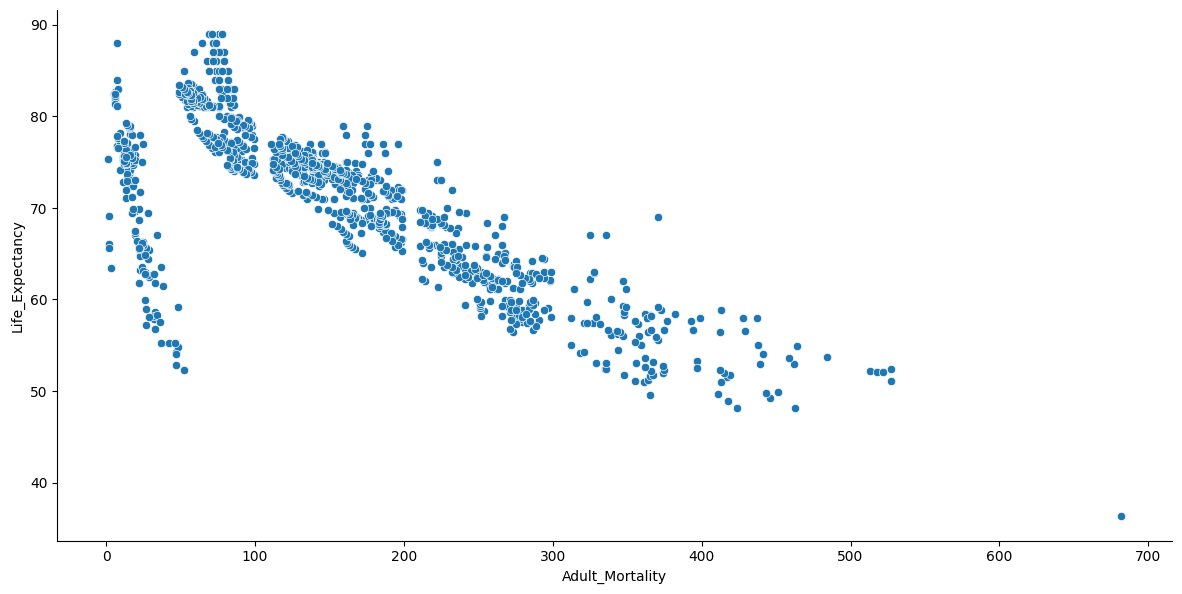

In [175]:
#Creates a scatter plot with Adult_Mortality as the independant parameter and Life_Expectancy as the target
sns.pairplot(df, x_vars=['Adult_Mortality'], y_vars='Life_Expectancy', height = 6, aspect = 2)
plt.show()

## Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?


> Eating habits will be grouped under 'BMI', social factors and alcohol will fall under 'Alcohol' and 'GDP' will be the main source for economic factors.


> Life Expectancy has a positive correlation with all of these factors. These correlations are relatively weak as you can see by their values in the correlation matrix and the scatter plots below. If we wanted to include the expenditures as a part of the economic factors, the correlation would still be positive, but even weaker.





In [176]:
#Creates and displays a correlation matrix with the values described by Life Expectancy
corr_matrix = df.corr()
corr_matrix["Life_Expectancy"].sort_values(ascending=False)

<ipython-input-176-30e0cbadc6e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Life_Expectancy           1.000000
Schooling                 0.744911
BMI                       0.507206
GDP                       0.431461
Alcohol                   0.416810
Percentage_Expenditure    0.370658
Total_Expenditure         0.218464
Year                      0.060949
Population               -0.033519
Adult_Mortality          -0.757724
Name: Life_Expectancy, dtype: float64

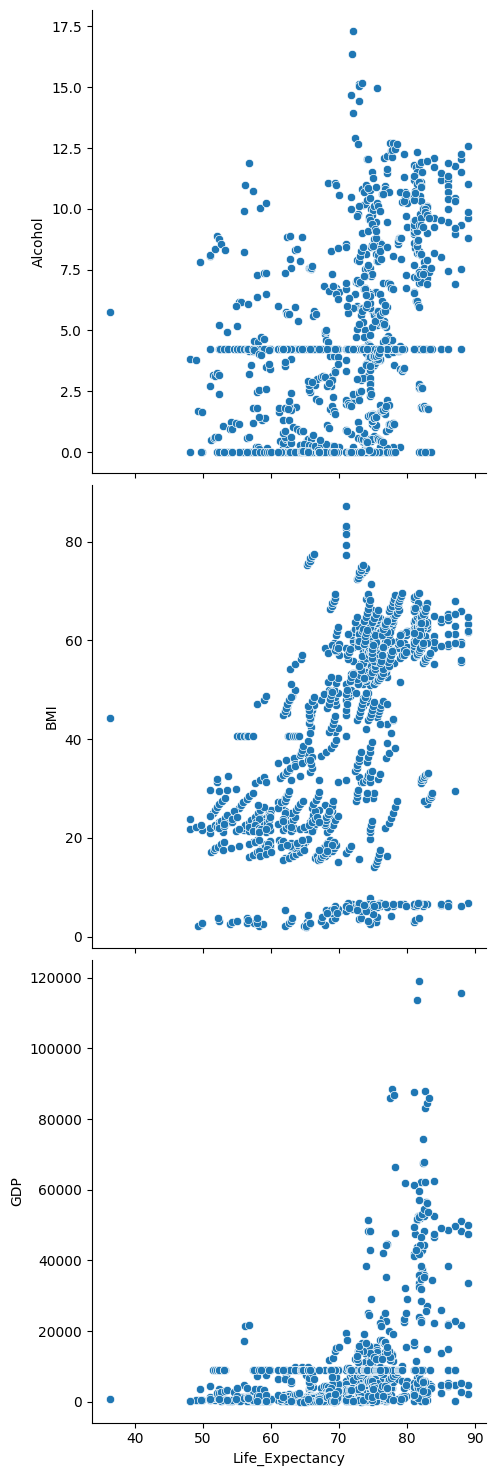

In [177]:
#Creates a scatter plot with Life_Expectancy as the independant parameter and Alcohol, BMI and GDP as the targets
sns.pairplot(df, x_vars=['Life_Expectancy'], y_vars= ['Alcohol', 'BMI', 'GDP'],  height = 5, aspect = 1)
plt.show()

## What is the impact of schooling on the lifespan of humans?


> As you can see below, Schooling and Life Expectancy are strongly and positively correlated.


> As the schooling rates increase, the lifespan of humans also increases.





In [178]:
#Creates and displays a correlation matrix with the values described by Schooling
corr_matrix = df.corr()
corr_matrix["Schooling"].sort_values(ascending=False)

<ipython-input-178-28a13d39a9dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Schooling                 1.000000
Life_Expectancy           0.744911
Alcohol                   0.481314
BMI                       0.437772
GDP                       0.424087
Percentage_Expenditure    0.365516
Total_Expenditure         0.178387
Year                      0.051184
Population               -0.044752
Adult_Mortality          -0.533490
Name: Schooling, dtype: float64

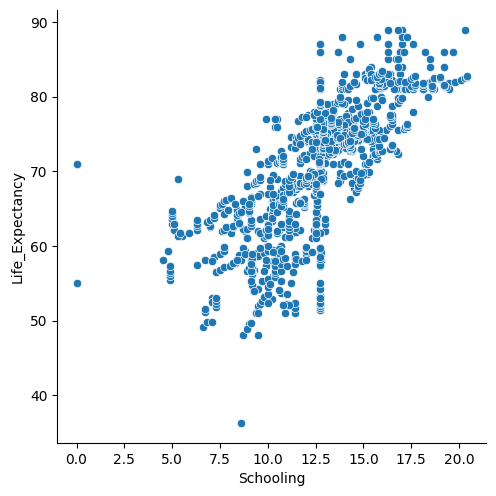

In [179]:
#Creates a scatter plot with Schooling as the independant parameter and Life Expectancy as the target
sns.pairplot(df, x_vars=['Schooling'], y_vars= ['Life_Expectancy'],  height = 5, aspect = 1)
plt.show()

## Create and plot several linear regression models for life expectancy (as the dependent variable) and the independent variables that had the highest correlation with life expectancy as found in your correlation analysis.


> Below, I first displayed the correlation matrix with Life_Expectancy. I then chose the 3 most correlated targets and displayed them as scatterplots. I then calculated the equation for their lines of best fit and displayed them. I also calulated the R2 score and mean squared error and displated those values.



In [180]:
#Creates and displays a correlation matrix with the values described by Life Expectancy
#I am displaying this specific matrix again because it is relevant to this current problem
#Though I am looking for Life_Expectancy as the dependent variable, I am displaying it like this because the correlation values will still be the same
#Doing this saves code and displays everything correlated with Life_Expectancy
corr_matrix = df.corr()
corr_matrix["Life_Expectancy"].sort_values(ascending=False)

<ipython-input-180-fadfbab79566>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Life_Expectancy           1.000000
Schooling                 0.744911
BMI                       0.507206
GDP                       0.431461
Alcohol                   0.416810
Percentage_Expenditure    0.370658
Total_Expenditure         0.218464
Year                      0.060949
Population               -0.033519
Adult_Mortality          -0.757724
Name: Life_Expectancy, dtype: float64

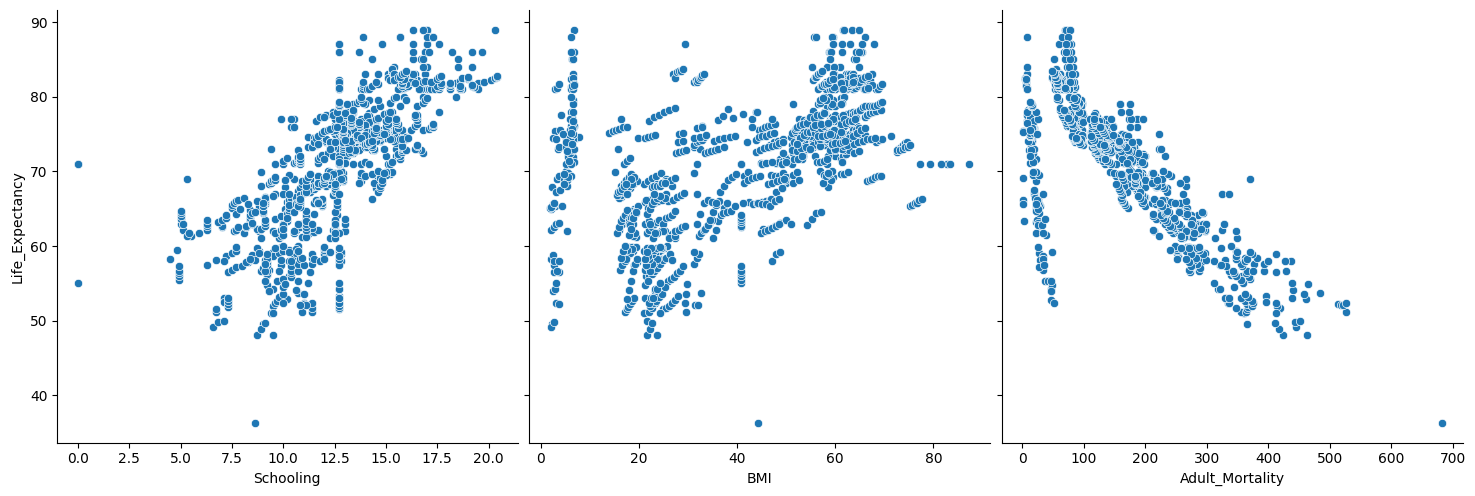

In [181]:
#Creates a scatter plot with Life_Expectancy as the dependaent parameter and Schooling, BMI, and Adult_Mortality as the independent parameters
#I chose these 3 targets because they are the most correlated with life expectancy
sns.pairplot(df, x_vars=['Schooling', 'BMI', 'Adult_Mortality'], y_vars= ['Life_Expectancy'],  height = 5, aspect = 1)
plt.show()

In [182]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# create the model
lm1 = linear_model.LinearRegression()

# reshape arrays; -1 means we don't specify #rows
x = df['Schooling'].values.reshape(-1,1)
y = df['Life_Expectancy'].values.reshape(-1,1)

# Fit the model using .fit() method
lm1.fit(x, y)

# intercept and slope values
print("Intercept :", lm1.intercept_)
print('Slope :', lm1.coef_)


Intercept : [42.70108059]
Slope : [[2.22611884]]


##Life_Expectancy = (2.22611884 * Schooling) + 42.70108059

In [183]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
from sklearn.metrics import r2_score, mean_squared_error

# make predictions using the entire data set
y_pred = lm1.predict(x)

print('R2 score:',            r2_score(y, y_pred))
print('Mean squared error:', mean_squared_error(y, y_pred))

R2 score: 0.5548920018135295
Mean squared error: 32.99983591342573


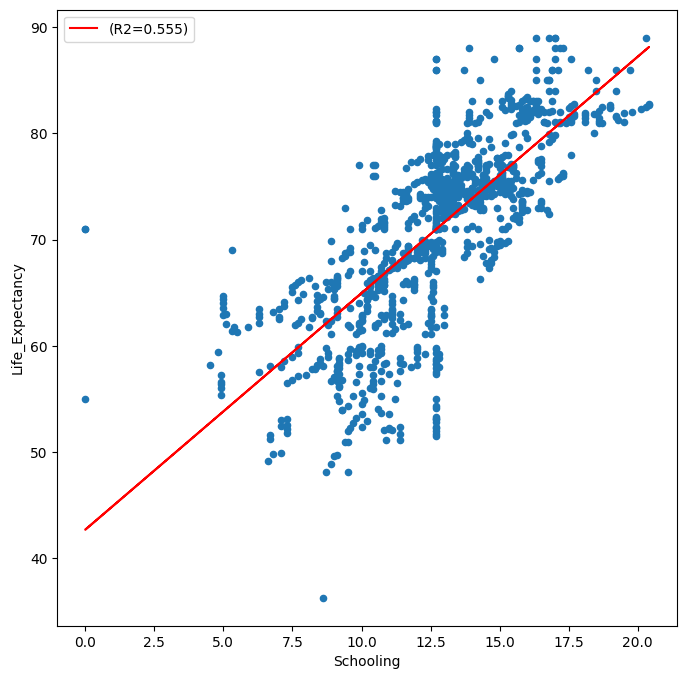

In [184]:
# plot the best fit linear models
df.plot(kind='scatter', x='Schooling', y='Life_Expectancy', figsize=(8, 8))

plt.plot(x, lm1.intercept_ + lm1.coef_*x, "r", label="(R2=0.555)")

plt.legend(loc="upper left")
plt.show()


In [185]:
# create the model
lm2 = linear_model.LinearRegression()

# reshape arrays; -1 means we don't specify #rows
x = df['BMI'].values.reshape(-1,1)
y = df['Life_Expectancy'].values.reshape(-1,1)

# Fit the model using .fit() method
lm2.fit(x, y)

# intercept and slope values
print("Intercept :", lm2.intercept_)
print('Slope :', lm2.coef_)


Intercept : [62.45320279]
Slope : [[0.2098436]]


##Life_Expectancy = (0.2098436 * BMI) + 62.45320279

In [186]:
# make predictions using the entire data set
y_pred = lm2.predict(x)

print('R2 score:',            r2_score(y, y_pred))
print('Mean squared error:', mean_squared_error(y, y_pred))

R2 score: 0.25725783842606587
Mean squared error: 55.066117791158526


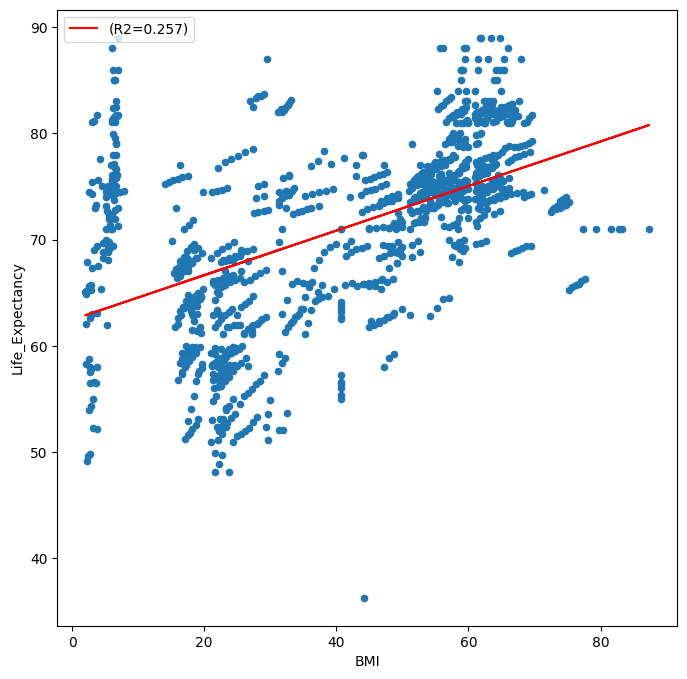

In [187]:
# plot the best fit linear models
df.plot(kind='scatter', x='BMI', y='Life_Expectancy', figsize=(8, 8))

plt.plot(x, lm2.intercept_ + lm2.coef_*x, "r", label="(R2=0.257)")

plt.legend(loc="upper left")
plt.show()

In [188]:
# create the model
lm3 = linear_model.LinearRegression()

# reshape arrays; -1 means we don't specify #rows
x = df['Adult_Mortality'].values.reshape(-1,1)
y = df['Life_Expectancy'].values.reshape(-1,1)

# Fit the model using .fit() method
lm3.fit(x, y)

# intercept and slope values
print("Intercept :", lm3.intercept_)
print('Slope :', lm3.coef_)

Intercept : [80.25768302]
Slope : [[-0.06053004]]


##Life_Expectancy = (-0.06053004 * Adult_Mortality) + 80.25768302

In [189]:
# make predictions using the entire data set
y_pred = lm3.predict(x)

print('R2 score:',            r2_score(y, y_pred))
print('Mean squared error:', mean_squared_error(y, y_pred))

R2 score: 0.5741457468891722
Mean squared error: 31.57238363037563


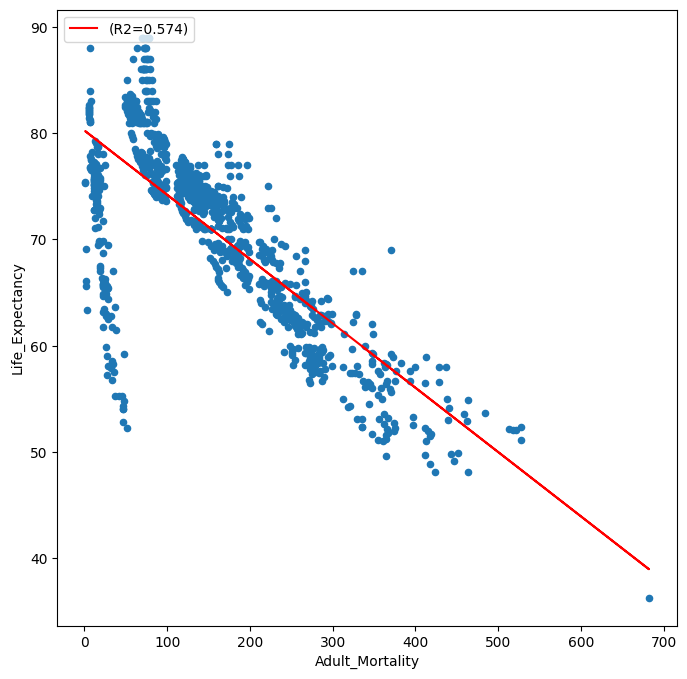

In [190]:
# plot the best fit linear models
df.plot(kind='scatter', x='Adult_Mortality', y='Life_Expectancy', figsize=(8, 8))

plt.plot(x, lm3.intercept_ + lm3.coef_*x, "r", label="(R2=0.574)")

plt.legend(loc="upper left")
plt.show()

##Conclusion


> Each pair of values is correlated to some extent. The values not listed were much more weakly correlated with Life_Expectancy. Adult_Mortality, Schooling and GDP are correlated the most with Life_Expectancy, respectively. Adult_Mortality is negatively correlated while the other two are positive. Schooling is the strongest positive correlation with Life_Expectancy, while Adult_Mortality is slightly stronger and negative.  


> The scatterplot for Adult_Mortality and Life_Expectancy with the line of best fit performs the best. Adult_Mortality has the highest coefficient of determination (R^2 value) which is 0.574. The value for their correlation is -0.758. There is the least variance when Adult_Mortality tries to explain the Life Expectancy. This specific model allows one to visualize the relationship between the data points. You can see that the line clearly goes through more points in a dense area than the other graphs.





Sources:
<br>https://github.com/bforoura/IDS/blob/main/linear_regression_Python.ipynb
<br> https://github.com/chrisfinan/IDS/blob/main/ExtraCredit/EC2/alcohol_consumption.ipynb



> I performed a bunch of copy and pasting from this code to assist in the Python part of this project. The first link mainly refers to the linear regression models. The second one refers to the dataframe operations with pandas.

